**Importing Libraries**

In [39]:
import os

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import matplotlib.pyplot as plt


**Reading and previewing the dataset**

In [2]:
df = pd.read_csv("Dataset/Car Details.csv")
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


**Overview of the dataset**

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [4]:
df.columns


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

**Removing unwanted collumns**

These columns inclued values that cannot be trained in a model because of inconsistancy. So they can be dropped from the dataframe

In [5]:
df = df.drop(['seller_type', 'owner', 'torque'], axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   mileage        7907 non-null   object 
 7   engine         7907 non-null   object 
 8   max_power      7913 non-null   object 
 9   seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 635.1+ KB


**Removing null values**

Null values cannot be trained in a model. So the rows that include null values must be removed from the dataframe

In [6]:
df = df.dropna()
df.isnull().sum()


name             0
year             0
selling_price    0
km_driven        0
fuel             0
transmission     0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

**Overview of the fuel column**

Fuel column has only 4 unique values. These values are String values and these has to be converted to numerical values. 

In [7]:
df['fuel'].value_counts()


Diesel    4299
Petrol    3520
CNG         53
LPG         35
Name: fuel, dtype: int64

Preview of the numerical representation of fuel column

In [8]:
df = df.replace({'fuel': {'Diesel': 0, 'Petrol': 1, 'CNG': 2, 'LPG': 3}})
df['fuel'].value_counts()


0    4299
1    3520
2      53
3      35
Name: fuel, dtype: int64

**Overview of the transmission column**

Transmission column has only 2 unique values. These values are String values and these has to be converted to numerical values. 

In [9]:
df['transmission'].value_counts()


Manual       6866
Automatic    1041
Name: transmission, dtype: int64

Preview of the numerical values of transmission column

In [10]:
df = df.replace({'transmission': {'Manual': 0, 'Automatic': 1}})
df['transmission'].value_counts()


0    6866
1    1041
Name: transmission, dtype: int64

**Overview of the mileage column**

Mileage column has values with unit abbreviations. These abbreviations must be filtered and must be in float (numerical) type 

In [11]:
df['mileage'] = df['mileage'].apply(lambda x: str(x).split(' ')[0])
df['mileage'] = df['mileage'].astype(float)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7907 entries, 0 to 8127
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7907 non-null   object 
 1   year           7907 non-null   int64  
 2   selling_price  7907 non-null   int64  
 3   km_driven      7907 non-null   int64  
 4   fuel           7907 non-null   int64  
 5   transmission   7907 non-null   int64  
 6   mileage        7907 non-null   float64
 7   engine         7907 non-null   object 
 8   max_power      7907 non-null   object 
 9   seats          7907 non-null   float64
dtypes: float64(2), int64(5), object(3)
memory usage: 679.5+ KB


**Overview of the engine column**

Engine column has values with unit abbreviations. These abbreviations must be filtered and must be in float (numerical) type 

In [12]:
df['engine'] = df['engine'].apply(lambda x: str(x).split(' ')[0])
df['engine'] = df['engine'].astype(float)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7907 entries, 0 to 8127
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7907 non-null   object 
 1   year           7907 non-null   int64  
 2   selling_price  7907 non-null   int64  
 3   km_driven      7907 non-null   int64  
 4   fuel           7907 non-null   int64  
 5   transmission   7907 non-null   int64  
 6   mileage        7907 non-null   float64
 7   engine         7907 non-null   float64
 8   max_power      7907 non-null   object 
 9   seats          7907 non-null   float64
dtypes: float64(3), int64(5), object(2)
memory usage: 679.5+ KB


**Overview of the max power column**

Max power column has values with unit abbreviations. These abbreviations must be filtered and must be in float (numerical) type 

In [13]:
df['max_power'] = df['max_power'].apply(lambda x: str(x).split(' ')[0])
df['max_power'] = pd.to_numeric(df['max_power'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7907 entries, 0 to 8127
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7907 non-null   object 
 1   year           7907 non-null   int64  
 2   selling_price  7907 non-null   int64  
 3   km_driven      7907 non-null   int64  
 4   fuel           7907 non-null   int64  
 5   transmission   7907 non-null   int64  
 6   mileage        7907 non-null   float64
 7   engine         7907 non-null   float64
 8   max_power      7906 non-null   float64
 9   seats          7907 non-null   float64
dtypes: float64(4), int64(5), object(1)
memory usage: 679.5+ KB


**Filter null values from dataframe**

Before splitting data into testing and training batches, all the null values must be filtered.

In [14]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   int64  
 5   transmission   7906 non-null   int64  
 6   mileage        7906 non-null   float64
 7   engine         7906 non-null   float64
 8   max_power      7906 non-null   float64
 9   seats          7906 non-null   float64
dtypes: float64(4), int64(5), object(1)
memory usage: 679.4+ KB


**Visualization of correaltions of columns**

<AxesSubplot:>

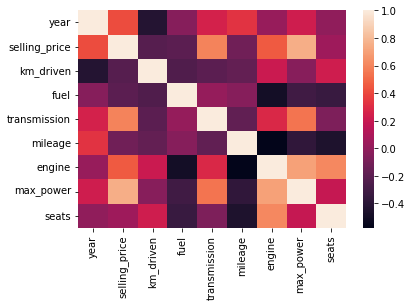

In [32]:
import seaborn as sns

sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns)

**Feature selection**

Selecting features that can be used for the models

In [15]:
X = df.drop(['name'], axis=1)
Y = df['selling_price']

**Preview of the final feature sets**

In [16]:
X.head()


,year,selling_price,km_driven,fuel,transmission,mileage,engine,max_power,seats
0,2014,450000,145500,0,0,23.40,1248.0,74.00,5.0
1,2014,370000,120000,0,0,21.14,1498.0,103.52,5.0
2,2006,158000,140000,1,0,17.70,1497.0,78.00,5.0
3,2010,225000,127000,0,0,23.00,1396.0,90.00,5.0
4,2007,130000,120000,1,0,16.10,1298.0,88.20,5.0


In [17]:
Y.head()


0    450000
1    370000
2    158000
3    225000
4    130000
Name: selling_price, dtype: int64

**Splitting training data and testing data**

In [50]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.1,random_state=2)


**Initiating and training the model - Linear Regression**

In [51]:
model=LinearRegression()
model.fit(xTrain,yTrain)

LinearRegression()

**Evaluating the model with test data**

In [52]:
prediction = model.predict(xTrain)
linear_score = metrics.r2_score(yTrain, prediction)
print('Score :', linear_score)


Score : 1.0


**Visualization of evaluation**

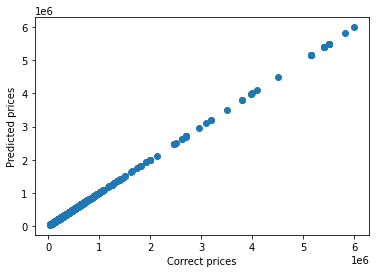

In [53]:
prediction = model.predict(xTest)
plt.scatter(yTest, prediction)
plt.title("Linear model predictions vs Actual data")
plt.xlabel("Correct prices")
plt.ylabel("Predicted prices")
plt.show()

**Comparison of the actual and prediction data**

In [54]:
data_for_pred = xTest[0:10]
data_for_comparison = yTest[0:10]

print(data_for_pred.index)
print(data_for_comparison.index)

Int64Index([4339, 6220, 4315, 4699, 3971, 2015, 6541, 1287, 764, 3586], dtype='int64')
Int64Index([4339, 6220, 4315, 4699, 3971, 2015, 6541, 1287, 764, 3586], dtype='int64')


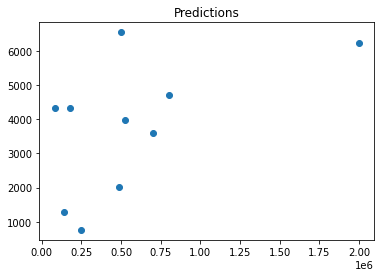

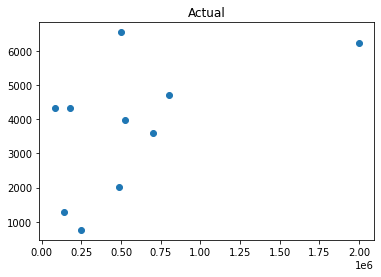

In [55]:
preds = model.predict(data_for_pred)
plt.scatter(x= preds, y=data_for_pred.index)
plt.title("Predictions")
plt.show()
plt.scatter(x= data_for_comparison, y=data_for_comparison.index)
plt.title("Actual")
plt.show()

**Initiating and training the model - Lasso Regression**

In [59]:
model=Lasso()
model.fit(xTrain,yTrain)

prediction = model.predict(xTrain)
lasso_score = metrics.r2_score(yTrain, prediction)
print('Score :', lasso_score)


Score : 1.0


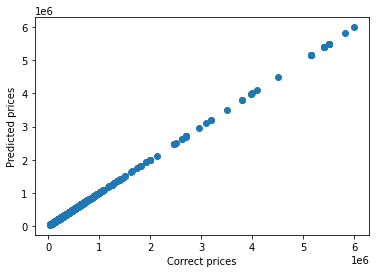

In [57]:
prediction = model.predict(xTest)
plt.scatter(yTest, prediction)
plt.title("Lasso model predictions vs Actual data")
plt.xlabel("Correct prices")
plt.ylabel("Predicted prices")
plt.show()